In [1]:
import sys
sys.path.append('C:\\Users\\adith\\Desktop\\backorder\\src')
from backorder_project.logger import logging

In [2]:
logging.info('testing log in ipynb file')

In [3]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
df = pd.read_csv("C:/data set backorder/Kaggle_Training_Dataset_v2.csv")
print(df.shape)
df.head(5)

C:\Users\adith\AppData\Local\Temp\ipykernel_4416\1181049036.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/data set backorder/Kaggle_Training_Dataset_v2.csv")


(1687861, 23)


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

<b>Data_Cleaning</b>

In [8]:
df.drop(columns=['sku'],inplace=True)

In [9]:
df.isnull().sum()

national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [10]:
# Dataset has 1 abnormal row : last row
df = df[:-1]

In [11]:
df.isnull().sum()

national_inv              0
lead_time            100893
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

In [12]:
print(df['lead_time'].median())

8.0


In [13]:
df['lead_time']= df['lead_time'].fillna(df['lead_time'].median())

In [14]:
df.isnull().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [15]:
obj_cols = [i for i in df.columns if df[i].dtype=='O']
num_cols = [i for i in df.columns if df[i].dtype!='O']

In [16]:
obj_cols

['potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

In [17]:
num_cols

['national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_3_month',
 'forecast_6_month',
 'forecast_9_month',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month',
 'min_bank',
 'pieces_past_due',
 'perf_6_month_avg',
 'perf_12_month_avg',
 'local_bo_qty']

In [18]:
#df.loc[:, obj_cols] = df[obj_cols].map(lambda x: 1 if x=='Yes' else 0)
for i in obj_cols:
    df[i].replace(['No','Yes'],[0,1],inplace=True)

C:\Users\adith\AppData\Local\Temp\ipykernel_4416\2725075510.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].replace(['No','Yes'],[0,1],inplace=True)
C:\Users\adith\AppData\Local\Temp\ipykernel_4416\2725075510.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i].replace(['No','Yes'],[0

In [19]:
for col in num_cols:
    if col in ['perf_6_month_avg', 'perf_12_month_avg', 'lead_time']:
        continue
    df[col] = df[col].astype(int)

In [20]:
df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,8.0,0,0,0,0,0,0,0,0,...,0,-99.00,-99.00,0,0,0,0,1,0,0
1,2,9.0,0,0,0,0,0,0,0,0,...,0,0.99,0.99,0,0,0,0,1,0,0
2,2,8.0,0,0,0,0,0,0,0,0,...,0,-99.00,-99.00,0,1,0,0,1,0,0
3,7,8.0,0,0,0,0,0,0,0,0,...,0,0.10,0.13,0,0,0,0,1,0,0
4,8,8.0,0,0,0,0,0,0,0,4,...,0,-99.00,-99.00,0,1,0,0,1,0,0


In [21]:
logging.info('data cleaning is done and feature selection will start')

<Axes: >

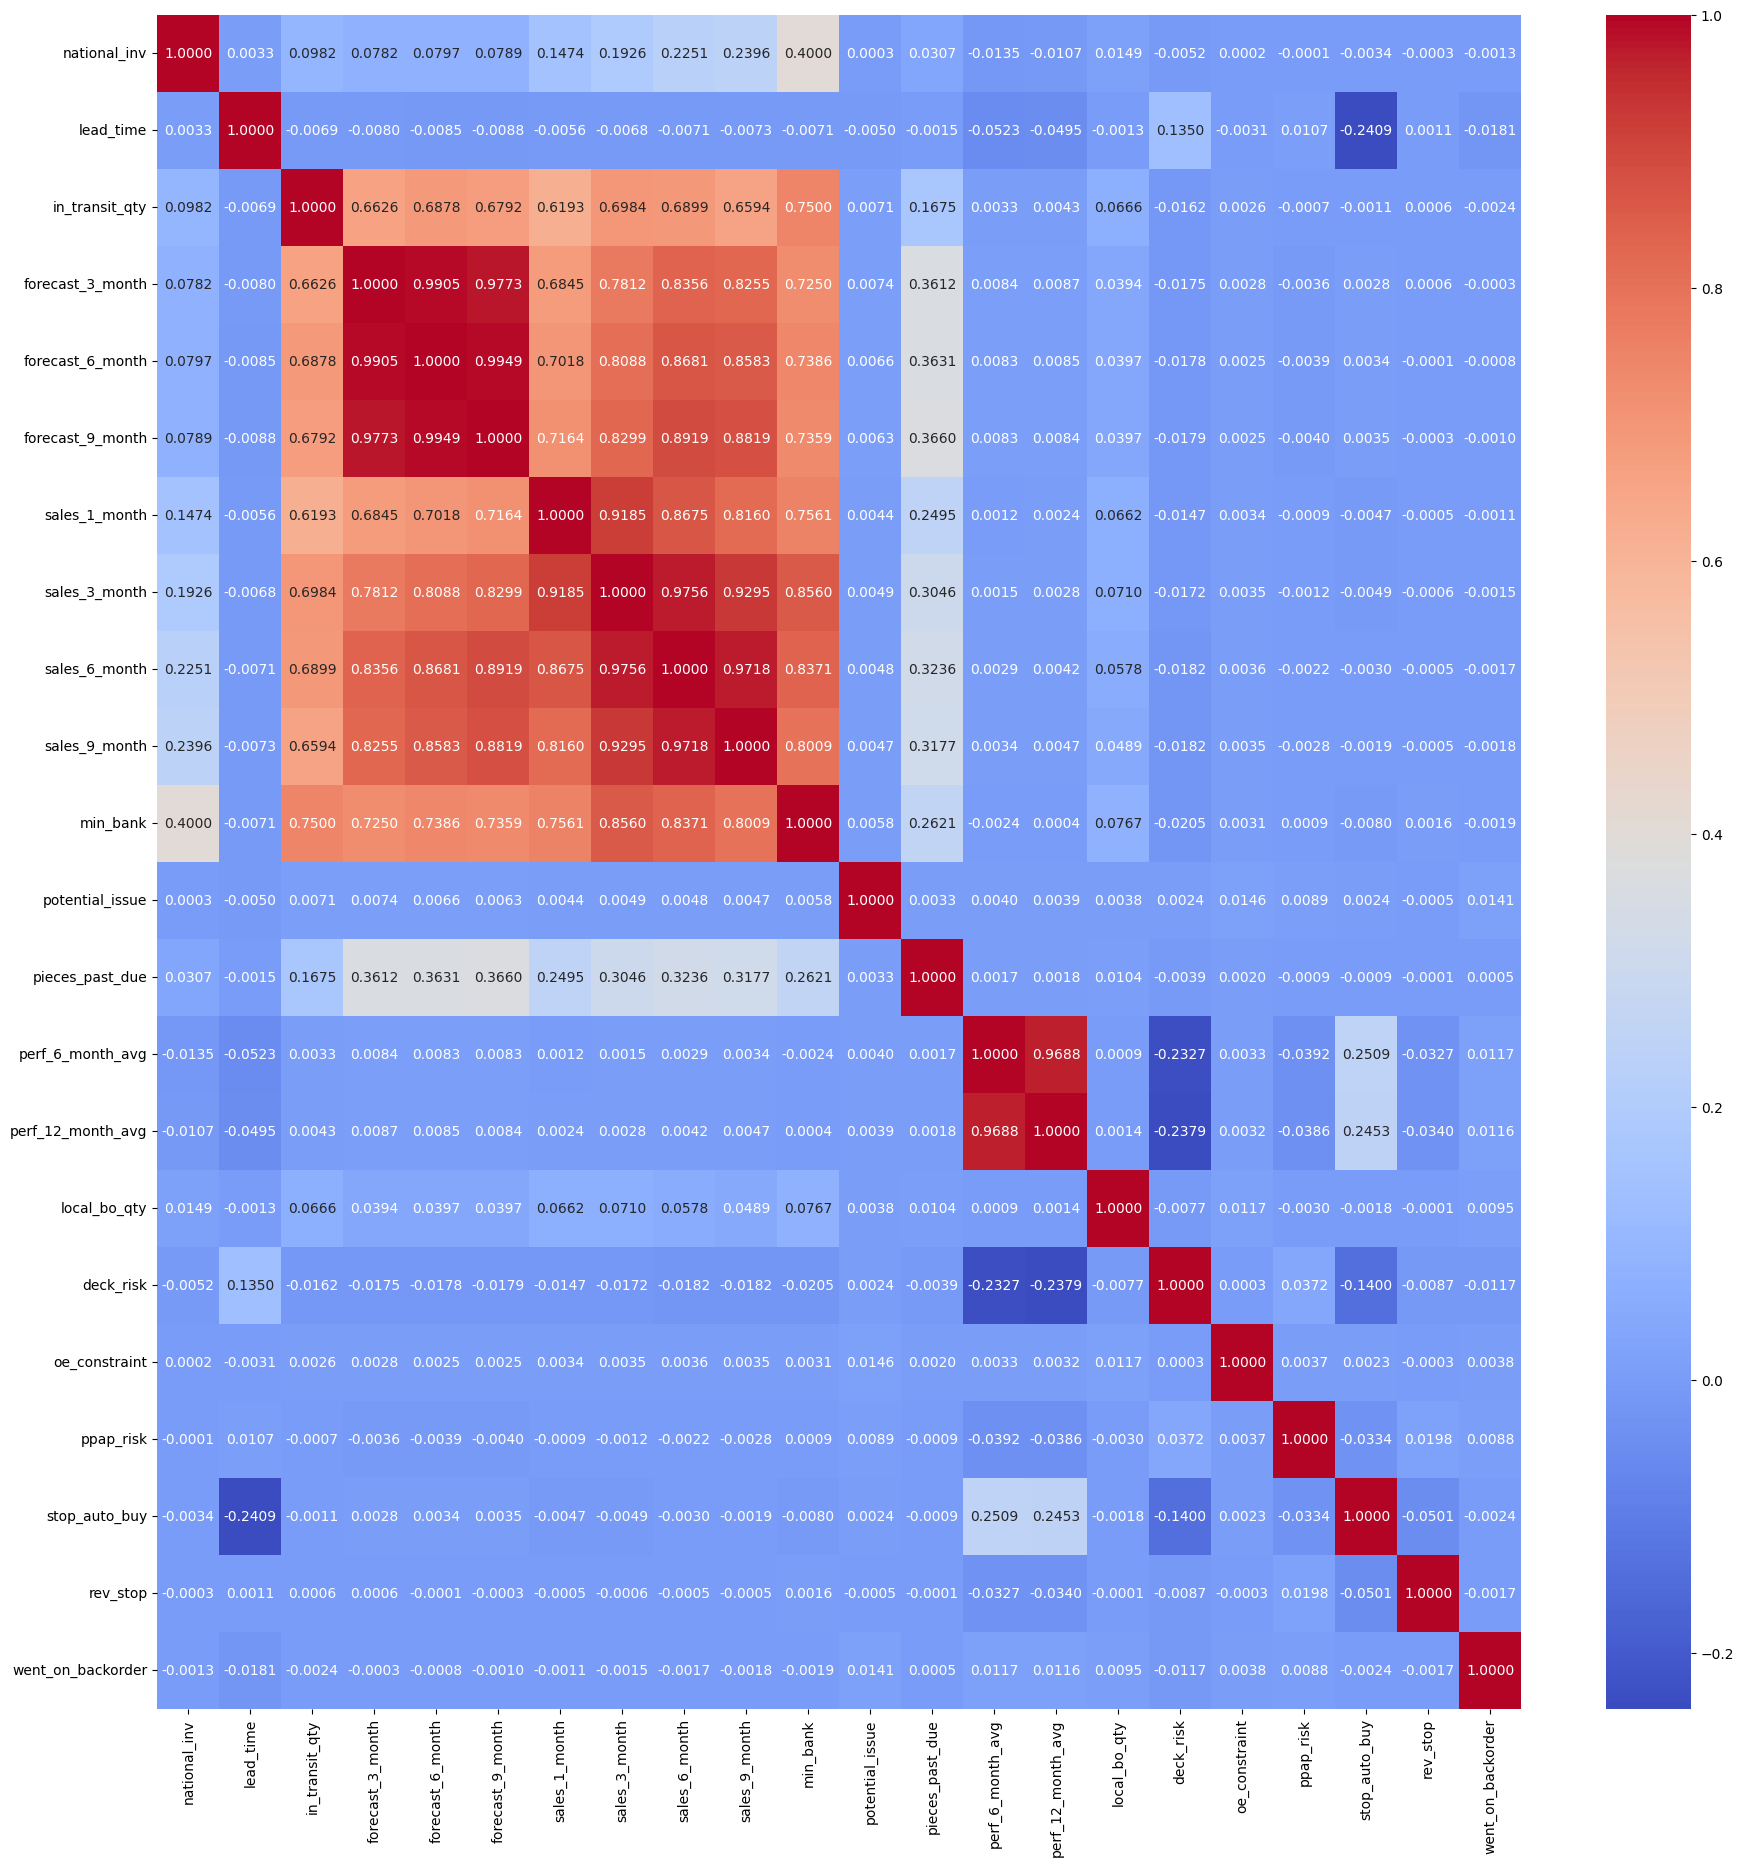

In [22]:
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(22, 22))
sns.heatmap(corr_matrix, annot=True, fmt='.4f', cmap='coolwarm')

In [23]:
corr_matrix['went_on_backorder'].sort_values(ascending=False)

went_on_backorder    1.000000
potential_issue      0.014090
perf_6_month_avg     0.011676
perf_12_month_avg    0.011593
local_bo_qty         0.009504
ppap_risk            0.008814
oe_constraint        0.003837
pieces_past_due      0.000516
forecast_3_month    -0.000340
forecast_6_month    -0.000840
forecast_9_month    -0.001030
sales_1_month       -0.001131
national_inv        -0.001315
sales_3_month       -0.001512
rev_stop            -0.001708
sales_6_month       -0.001728
sales_9_month       -0.001764
min_bank            -0.001867
stop_auto_buy       -0.002424
in_transit_qty      -0.002427
deck_risk           -0.011691
lead_time           -0.018104
Name: went_on_backorder, dtype: float64

In [24]:
top_corr_cols = (corr_matrix['went_on_backorder']
                    .apply(lambda x: abs(x))
                    .sort_values(ascending=False)[:13]
                    .index
                    )

In [25]:
df1= df[top_corr_cols] #filterng only top13 corelated columns
df1.head()

,went_on_backorder,lead_time,potential_issue,deck_risk,perf_6_month_avg,perf_12_month_avg,local_bo_qty,ppap_risk,oe_constraint,in_transit_qty,stop_auto_buy,min_bank,sales_9_month
0,0,8.0,0,0,-99.00,-99.00,0,0,0,0,1,0,0
1,0,9.0,0,0,0.99,0.99,0,0,0,0,1,0,0
2,0,8.0,0,1,-99.00,-99.00,0,0,0,0,1,0,0
3,0,8.0,0,0,0.10,0.13,0,0,0,0,1,1,0
4,0,8.0,0,1,-99.00,-99.00,0,0,0,0,1,2,4


In [26]:
logging.info('eda will start')

In [27]:
#forecast_cols = df.columns[df.columns.str.startswith('forecast')]
#sns.pairplot(df, vars=forecast_cols, hue='went_on_backorder', height=3)
#taking a lot of time to compute

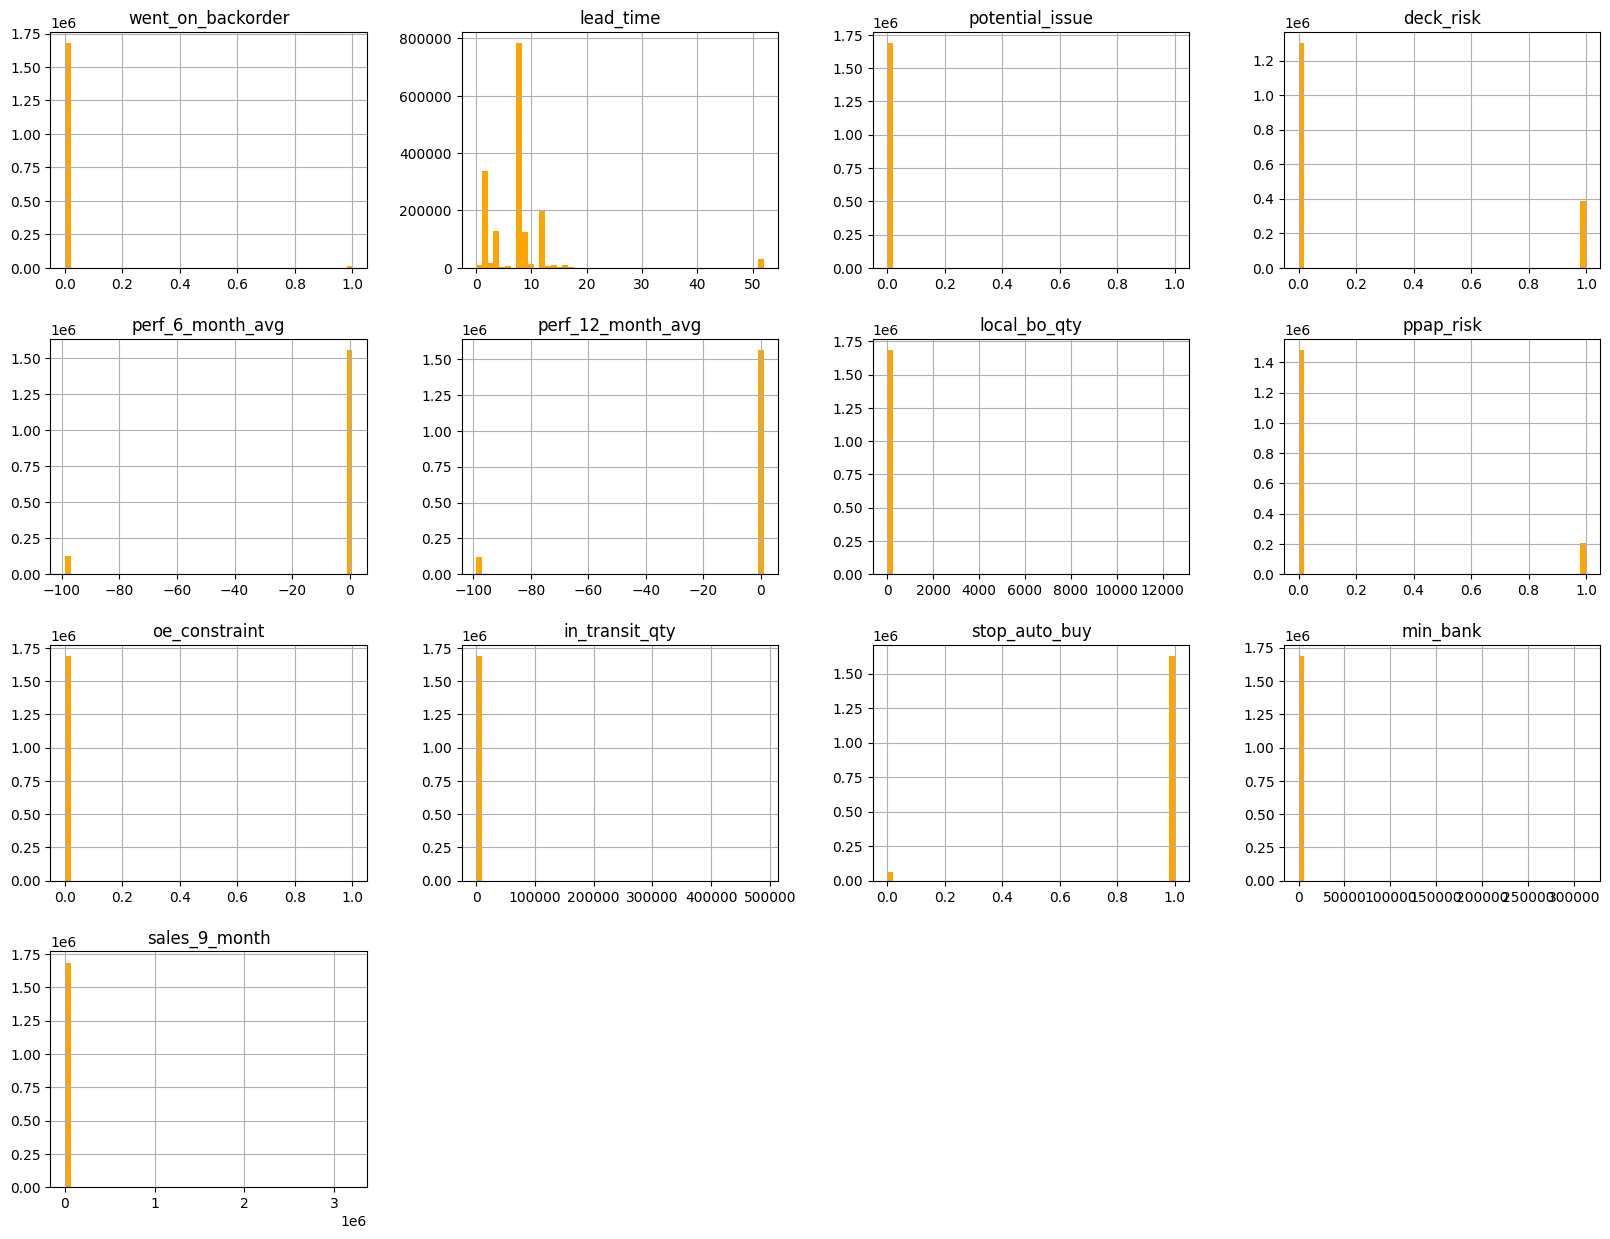

In [28]:
df1.hist(bins=50, figsize=(20,15), color = "orange")
plt.show()

In [29]:
df1['went_on_backorder'].value_counts()

went_on_backorder
0    1676567
1      11293
Name: count, dtype: int64

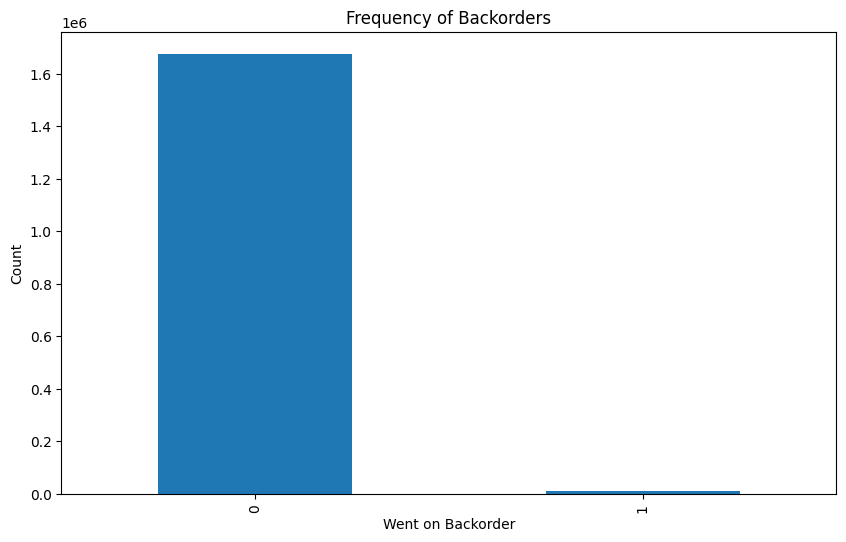

In [30]:
backorder_counts = df1['went_on_backorder'].value_counts()
backorder_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Went on Backorder')
plt.ylabel('Count')
plt.title('Frequency of Backorders')
plt.show()

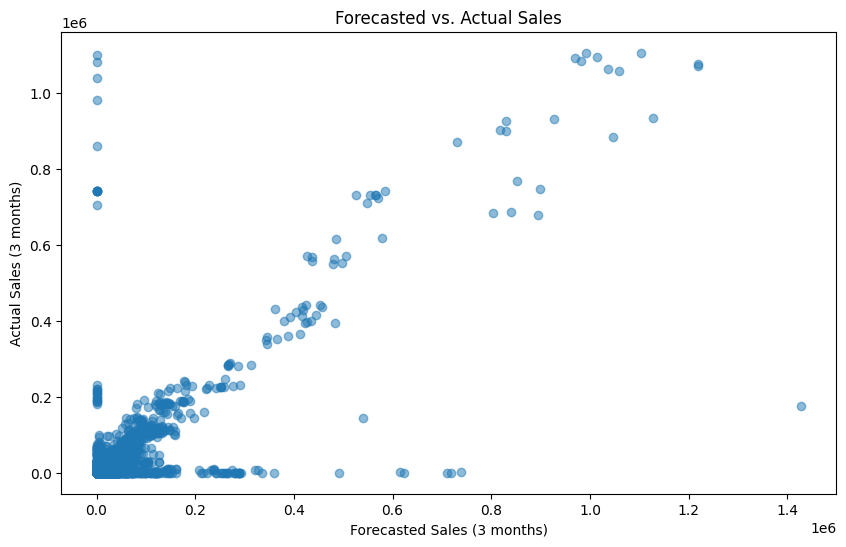

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(df['forecast_3_month'], df['sales_3_month'], alpha=0.5)
plt.xlabel('Forecasted Sales (3 months)')
plt.ylabel('Actual Sales (3 months)')
plt.title('Forecasted vs. Actual Sales')
plt.show()

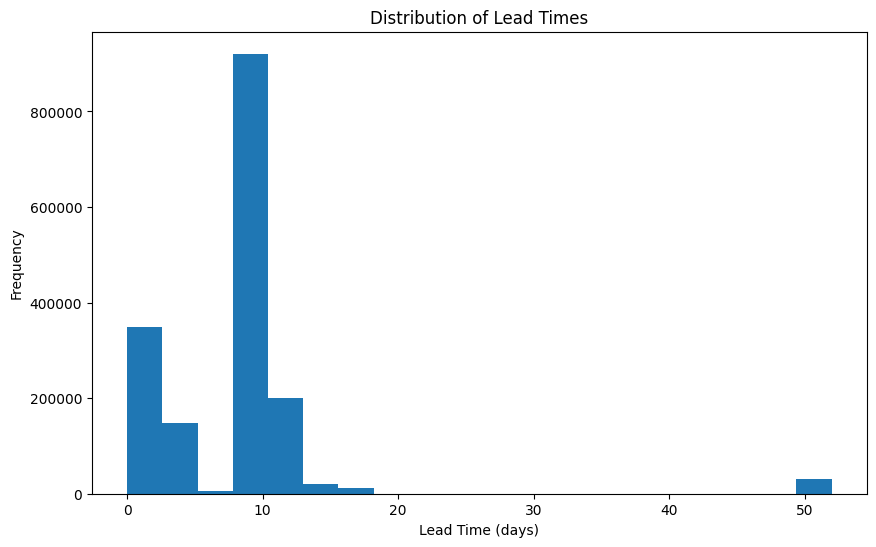

In [32]:
df['lead_time'].plot(kind='hist', bins=20, figsize=(10, 6))
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Lead Times')
plt.show()

<Figure size 1000x600 with 0 Axes>

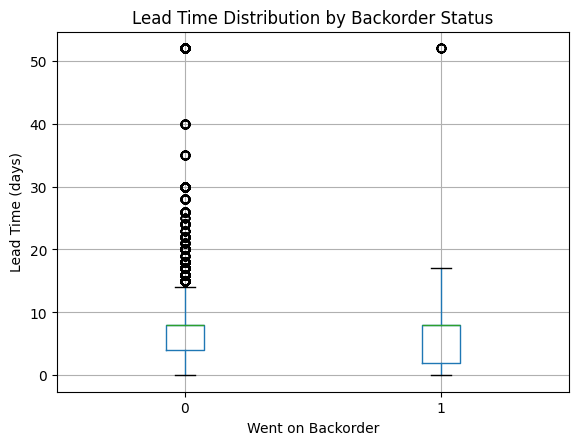

In [33]:
plt.figure(figsize=(10, 6))
df.boxplot(column='lead_time', by='went_on_backorder')
plt.xlabel('Went on Backorder')
plt.ylabel('Lead Time (days)')
plt.title('Lead Time Distribution by Backorder Status')
plt.suptitle('')  # Suppress the default title to avoid redundancy
plt.show()

This box plot will help us visualize the distribution of lead times for products that went on backorder (Yes)"1" versus those that didn’t (No)"0". it indicate that lead time is a critical factor in whether a product goes on backorder

<Figure size 1000x600 with 0 Axes>

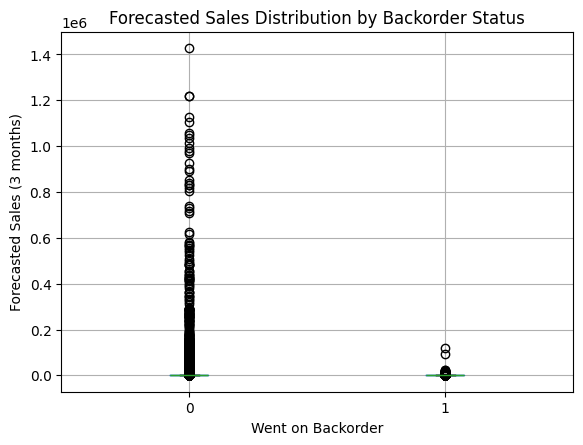

In [34]:
plt.figure(figsize=(10, 6))
df.boxplot(column='forecast_3_month', by='went_on_backorder')
plt.xlabel('Went on Backorder')
plt.ylabel('Forecasted Sales (3 months)')
plt.title('Forecasted Sales Distribution by Backorder Status')
plt.suptitle('')  # Suppress the default title to avoid redundancy
plt.show()

This box plot will help you visualize the distribution of forecasted sales for products that went on backorder (Yes)"1" versus those that didn’t (No) "0". there is a significant difference, products with higher forecasted sales are less likely to go on backorder, as indicated by the higher concentration of data points in the 0 category.

In [35]:
logging.info('eda over and model building will start')

Feature selection for Model

We are Peforming resampling on the went_on_backorder target feature to balance the dataset. Spliting the data with train_test_split and then transform the data with ColumnTransformer object which you previously build.

In [36]:
# Feature selection
corr_matrix = df.corr()
corr_with_y = corr_matrix["went_on_backorder"].drop("went_on_backorder")  # drop "Y" from the correlation matrix since it will be 1.0
logging.info(corr_with_y)
relevant_features = corr_with_y[corr_with_y>0.004]
relevant_features_1 = corr_with_y[corr_with_y<-0.004]

In [37]:
features = ['national_inv', 'lead_time', 'sales_1_month', 'pieces_past_due', 'perf_6_month_avg','in_transit_qty',
            'local_bo_qty', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop']

In [38]:
x = df[features]
x.shape

(1687860, 12)

In [39]:
y=df['went_on_backorder']
y.shape

(1687860,)

**Resampling**

In [40]:
# Resampling
logging.info('Resampling data...')
oversampler = RandomOverSampler()
x_resampled, y_resampled = oversampler.fit_resample(x, y)
print(y_resampled.value_counts())

went_on_backorder
0    1676567
1    1676567
Name: count, dtype: int64


In [41]:
x_resampled.shape

(3353134, 12)

In [42]:
# Split into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x_resampled,y_resampled, random_state=0, test_size=0.2)

In [43]:
y_train.value_counts()

went_on_backorder
1    1341254
0    1341253
Name: count, dtype: int64

<Figure size 2000x2000 with 0 Axes>

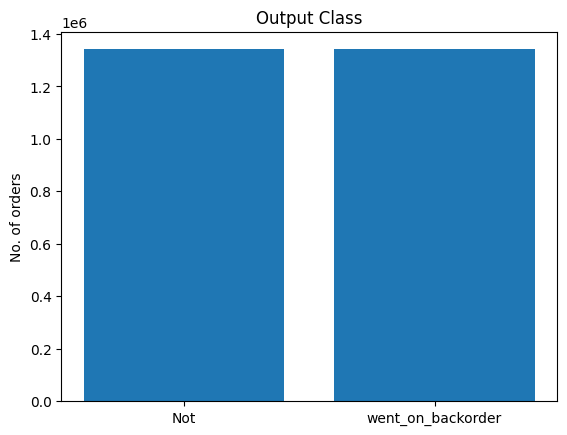

In [44]:
classes=['Not','went_on_backorder']
plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
ax.bar(classes,y_train.value_counts())
plt.title("Output Class")
plt.ylabel("No. of orders")
plt.show()

**model building**

In [45]:
model_1 = DecisionTreeClassifier()
model_1.fit(x_train, y_train)
y_pred_1 = model_1.predict(x_test)   
acc_score = accuracy_score(y_test, y_pred_1)
conf_matrix = confusion_matrix(y_test, y_pred_1)

In [46]:
print("Accuracy score for Decision Tree",acc_score)

Accuracy score for Decision Tree 0.9555460785205486


In [47]:
model_2 = RandomForestClassifier(n_estimators=40)
model_2.fit(x_train, y_train)
y_pred_2 = model_2.predict(x_test)
acc_score_2 = accuracy_score(y_test, y_pred_2)
conf_matrix = confusion_matrix(y_test, y_pred_2)
print("Accuracy Score for Random Forest",acc_score_2)

Accuracy Score for Random Forest 0.9562856848889174


In [48]:
logging.info('model building and eda are done')

In [51]:
import joblib
joblib.dump(model_1,'backorder_model2')

['backorder_model2']

We can see that random forest gives more accurate result but we are taking  decisiontree which gives equally better result as random forest model size is big and need support of git lfs and other things.